Import the libraries necesary for this model.

In [22]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

Import the data file into a dataframe and examine the features of the dataframe. 

In [2]:
#load the csv file into a dataframe
forest_info = pd.read_csv('covtype.csv')

In [3]:
#print out top rows examine what is in the dataframe
forest_info.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# check for null values, and if there is anything that has to be hot encoded
forest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
# find the number of values and columns
forest_info.shape

(581012, 55)

In [6]:
# determine the values in the cover type column as that is the target variable
forest_info['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

Condense tree types 2, 3, 4, 5, 6, and 7 into a single class to fix the class imbalance and create a binary classification problem. 

In [7]:
# there is a large class imbalance. to fix this, change data to a binary classfication problem
# wil determine if tree type is type 2 (Lodgepole Pine) or not, so change all other types to 0 value
forest_info['Cover_Type'].replace(to_replace = 1, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 3, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 7, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 6, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 5, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 4, value = 0, inplace=True)

In [8]:
forest_info['Cover_Type'].value_counts()

0    297711
2    283301
Name: Cover_Type, dtype: int64

In [9]:
# for clarification, change type 2 tree (Lodgepole Pine) to be represented as type 1
forest_info['Cover_Type'].replace(to_replace = 2, value = 1, inplace=True)

In [10]:
forest_info['Cover_Type'].value_counts()

0    297711
1    283301
Name: Cover_Type, dtype: int64

Define X and y fetaures and split data into test and train sets. 

In [11]:
# data is now properly preprocessed, now we will define X and y features
X = forest_info.drop('Cover_Type', axis=1)
y = forest_info['Cover_Type']

In [12]:
# create am 80/20 split for the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

train a basic model of the decision tree. 

In [13]:
# create a decision tree calssifier using entropy, then fit the the clasifier to the training data
DTC = DecisionTreeClassifier(criterion = 'entropy')
DT_model = DTC.fit(X_train, y_train)

In [14]:
# use the trained decision tree to make predictions of the type of tree
predict_y = DTC.predict(X_test)

create a confusion matrix to determine the true positives and true negatives, also determine the evaluation metrics. 

In [15]:
# create a confusion matrix to determine the number of true positives, true negatives, false positives, and false negatives
cm = (confusion_matrix(y_test, predict_y))
print(cm)

[[57169  2614]
 [ 2638 53782]]


In [16]:
# number of true positives are 53,795
# number of true negavites are 57,139
# number of false positives are 2,644
# number of false negatives are 2,625

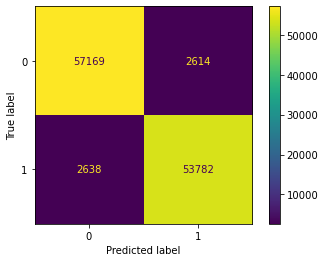

In [17]:
plot_confusion_matrix(DT_model, X_test, y_test)

In [18]:
# calculate accuracy of the prediction
accuracy = accuracy_score(y_test, predict_y)
print('Accuracy is :{0}'.format(accuracy))

Accuracy is :0.954803232274554


In [51]:
precision = precision_score(y_test, predict_y)
print('Precision is :{0}'.format(precision))

Precision is :0.9536491949783673


In [20]:
recall = recall_score(y_test, predict_y)
print('Recall is :{0}'.format(recall))

Recall is :0.9532435306628855


In [21]:
F1 = f1_score(y_test, predict_y)
print('F1 is :{0}'.format(F1))

F1 is :0.9534463196709687


Tune hyperparamters to find which will create the best model. 

In [61]:
params = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20], 'min_samples_split':[2,20]}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, scoring = 'precision')
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
                         'min_samples_split': [2, 20]},
             scoring='precision')

In [63]:
gridSearch.cv_results_

{'mean_fit_time': array([ 3.12521467,  3.21611996,  3.77544904,  3.83967352,  4.4052269 ,
         4.4384717 ,  5.08381214,  5.26165071,  5.66638093,  5.60995946,
         6.32617579,  6.34006786,  6.87033844,  6.83906746,  7.55733299,
         7.45966988,  8.061343  ,  7.99684854,  9.32911272,  9.29682584,
        10.95032835, 10.94014268]),
 'std_fit_time': array([0.03733594, 0.08865964, 0.12004592, 0.11064075, 0.06428941,
        0.1432638 , 0.08877314, 0.24185495, 0.13423956, 0.09260659,
        0.06803635, 0.12309203, 0.13290103, 0.05945045, 0.14911758,
        0.05342859, 0.05805553, 0.10355497, 0.07838581, 0.08173087,
        0.06889683, 0.01888796]),
 'mean_score_time': array([0.1224967 , 0.11681843, 0.10840216, 0.11653156, 0.11907291,
        0.11841526, 0.11346993, 0.13943548, 0.12191334, 0.12134852,
        0.12082071, 0.1341269 , 0.12863812, 0.12479148, 0.12492204,
        0.13318911, 0.12853985, 0.13437152, 0.13342438, 0.13703041,
        0.14484291, 0.15444422]),
 'std_sc

In [22]:
# tune hyperparameters starting with max depth
depth = np.arange(1,31,2)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

(0.0, 31.0, 0.6, 1.0)

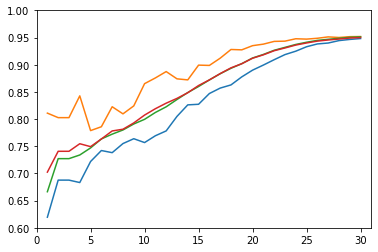

In [23]:
plt.plot(depth, precision, label = 'precision')
plt.plot(depth, recall, label = 'recall')
plt.plot(depth, accuracy, label = 'accuracy')
plt.plot(depth, F1, label = 'F1')
plt.axis([0,31,0.6,1])

In [ ]:
# tune hyperparameters starting with max depth
depth = np.arange(31,60)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))


In [ ]:
plt.plot(depth, precision, label = 'precision')
plt.plot(depth, recall, label = 'recall')
plt.plot(depth, accuracy, label = 'accuracy')
plt.plot(depth, F1, label = 'F1')
plt.axis([30,60,0.948,0.956])

In [31]:
sample_split = np.arange(2,20)
precision = []
recall = []
accuracy = []
F1 = []
for n in sample_split:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

(2.0, 20.0, 0.94, 0.955)

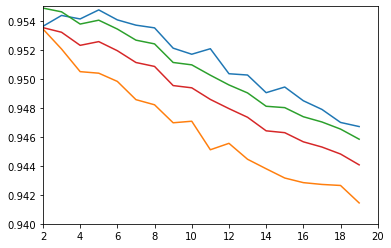

In [34]:
plt.plot(sample_split, precision)
plt.plot(sample_split, recall)
plt.plot(sample_split, accuracy)
plt.plot(sample_split, F1)
plt.axis([2,20,0.94,0.955])

In [35]:
sample_leaf = np.arange(1,10)
precision = []
recall = []
accuracy = []
F1 = []
for n in sample_leaf:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

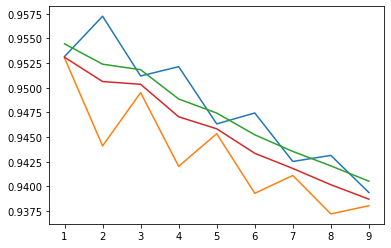

In [37]:
plt.plot(sample_leaf, precision)
plt.plot(sample_leaf, recall)
plt.plot(sample_leaf, accuracy)
plt.plot(sample_leaf, F1)

In [49]:
features = np.arange(1,40)
precision = []
recall = []
accuracy = []
F1 = []
for n in features:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_features = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

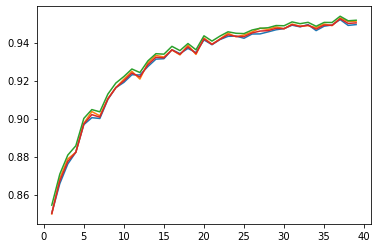

In [42]:
plt.plot(features, precision)
plt.plot(features, recall)
plt.plot(features, accuracy)
plt.plot(features, F1)

In [48]:
features = np.arange(1,60)
precision = []
recall = []
accuracy = []
F1 = []
for n in features:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_features = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

ValueError: max_features must be in (0, n_features]

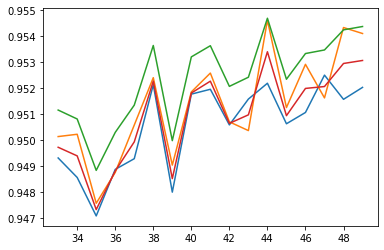

In [44]:
plt.plot(features, precision)
plt.plot(features, recall)
plt.plot(features, accuracy)
plt.plot(features, F1)

In [ ]:
 DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = 48, max_features = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))